![openclassrooms](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/courses/6204541/1+HnqdJ-5ofxiPP9HIxdNdpw.jpeg)

# Tracez des graphiques avec matplotlib

Vous êtes en train de préparer le reporting mensuel que vous devez présenter chaque fin de mois à votre responsable. La présentation devra comprendre certains graphiques clés : vous allez donc devoir utiliser vos compétences en data visualisation pour produire les différentes visualisations attendues.

Les graphiques à produire sont donc :
- la proportion de prêt par type de prêt
- le bénéfice mensuel réalisé en fonction du revenu du client
- la distribution des bénéfices réalisés
- le bénéfice mensuel total réalisé par agence


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pour réaliser les différents graphiques, nous utiliserons le fichier de prêt enrichi ([c.f. exercice précédent](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P2/P2C3%20-%20Filtrez%20les%20donn%C3%A9es%20du%20data%20frame%20-%20correction.ipynb)) que vous trouverez [à cette adresse](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv) :

In [ ]:
prets = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv')

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


## 1. proportion de prêt par type de prêt.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prets = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


## 2. bénéfice mensuel réalisé en fonction du revenu du client

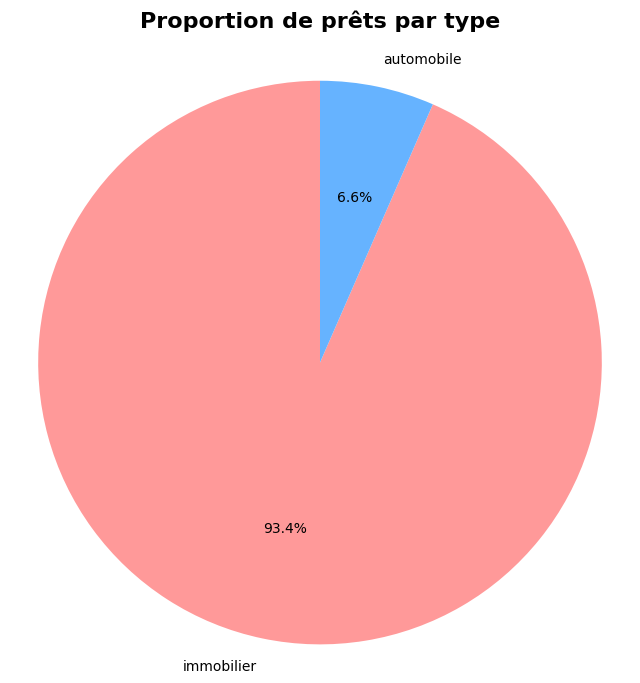

In [2]:
type_counts = prets['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion de prêts par type', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

## 3. La distribution des bénéfices réalisés

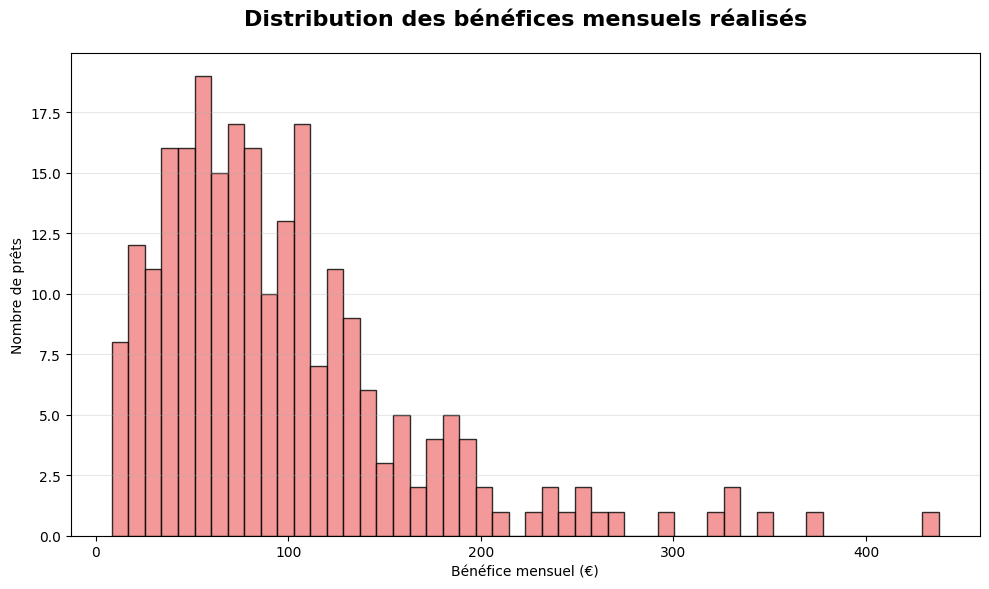

In [15]:
# 3. Distribution des bénéfices réalisés sur l'ensemble des prêts
plt.figure(figsize=(10, 6))
plt.hist(prets['benefices'], bins=50, color='lightcoral', edgecolor='black', alpha=0.8)
plt.title('Distribution des bénéfices mensuels réalisés', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Bénéfice mensuel (€)')
plt.ylabel('Nombre de prêts')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. bénéfice mensuel total réalisé par agence

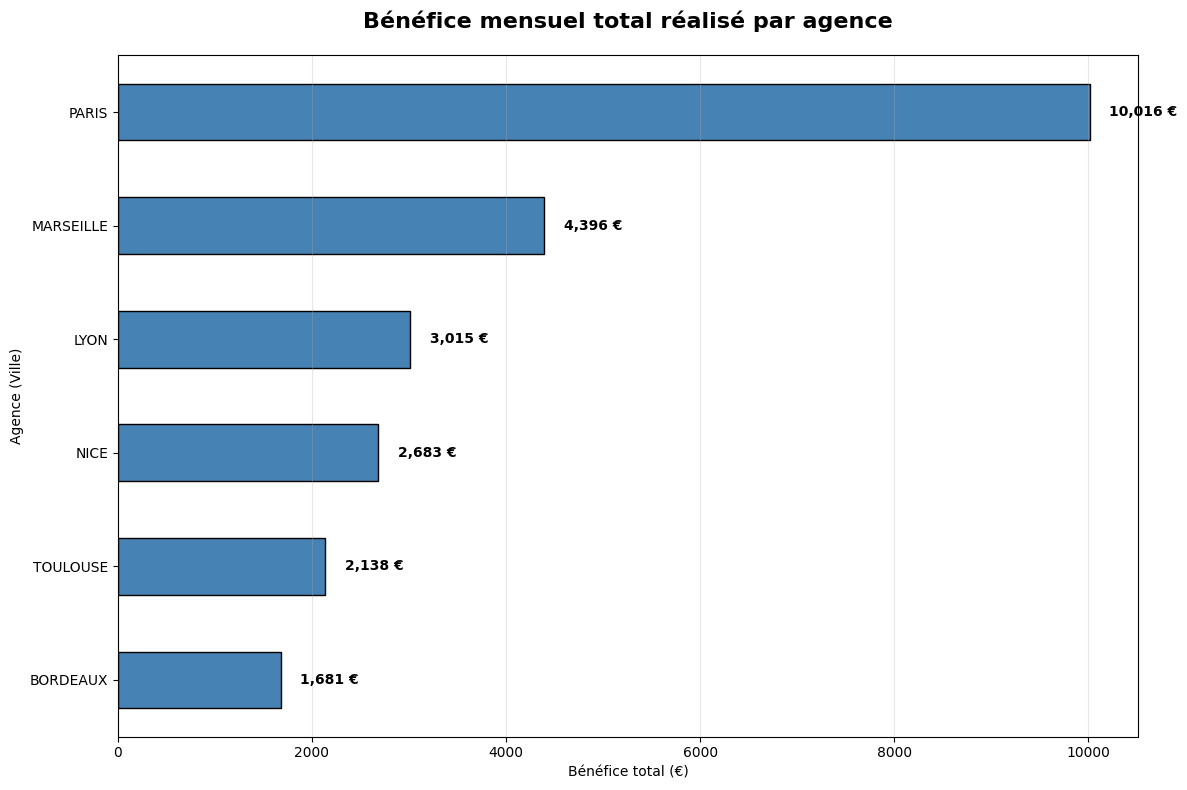

In [16]:
# 4. Bénéfice mensuel total par agence (ville)
benef_par_agence = prets.groupby('ville')['benefices'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
benef_par_agence.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Bénéfice mensuel total réalisé par agence', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Bénéfice total (€)')
plt.ylabel('Agence (Ville)')

# Ajout des valeurs à la fin de chaque barre
for i, v in enumerate(benef_par_agence):
    plt.text(v + 200, i, f'{v:,.0f} €', va='center', fontweight='bold', color='black')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Félicitations pour être arrivé au bout ! Voici [la correction correspondante](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P3/P3C2%20-%20Tracez%20des%20graphiques%20avec%20Matplotlib%20-%20correction.ipynb).